In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [14]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/polls_question.parquet'

# 데이터 불러오기
question_df = pd.read_parquet(gcs_path, engine='pyarrow')
question_df

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
...,...,...,...
5020,5129,나에게 가장 중요한 사람은?,2023-06-06 06:15:52
5021,5130,오목을 제일 잘 할 것 같은 사람은?,2023-06-06 06:15:52
5022,5131,가방에서 쓰레기가 안 나올 것 같은 사람은?,2023-06-06 06:15:52
5023,5132,아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는?,2023-06-06 06:15:52


In [15]:
question_df.dtypes

id                        int64
question_text            object
created_at       datetime64[ns]
dtype: object

In [16]:
question_df.isnull().sum()

id               0
question_text    0
created_at       0
dtype: int64

In [17]:
question_df['question_text'].nunique()  # 전체 질문 개수 (중복 제거 기준)

3903

In [18]:
question_df['question_text'].value_counts().head(20)

question_text
vote                           56
인생 2회차인 것 같은 사람은?               3
2세가 가장 귀여울 것 같은 사람은?            3
눈이 제일 큰 사람은?                    3
지금 뭐하는지 궁금한 친구                  3
같이 밥먹고 싶은 사람은?                  3
가장 어른스러운 친구는?                   2
30살까지 애인이 안생기면 결혼하고 싶은 친구는?     2
과즙상인 친구는?                       2
우리집 비밀번호 알려줘도 괜찮은 사람은?          2
목소리에 오토튠 깔려있는것 같은 사람            2
홍대에서 춤 출것 같은 친구는?               2
무지개와 가장 잘 어울리는 사람               2
도마뱀을 닮은 사람은?                    2
나중에 슈퍼카 타고 다닐 것 같은 사람?          2
결혼식에서 사회를 봐줬으면 하는 친구는?          2
엘리베이터에 갇혔을 때 전화하고 싶은 사람은?       2
어딜 가도 혼자 잘 지낼 것 같은 사람은?         2
호그와트의 분위기가 가장 어울리는 친구는?         2
나와의 추억이 가장 많은 사람은?              2
Name: count, dtype: int64

In [19]:
question_df['question_text'].dropna().unique()[:10]

array(['가장 신비한 매력이 있는 사람은?', '"이 사람으로 한 번 살아보고 싶다" 하는 사람은?', '미래의 틱톡커는?',
       '여기서 제일 특이한 친구는?', '가장 지켜주고 싶은 사람은?', '내 어깨를 내어줄 수 있는 사람은?',
       '볼 한 번 눌러보고 싶은 사람은?', '은근히 애교가 많을 것 같은 사람은?',
       '누가 봐도 좋아할 것 같은 호감인 사람은?', '가장 매력적인 사람은?'], dtype=object)

#### 중복 질문

In [20]:
# 전체 질문 수
total = question_df['question_text'].shape[0]

# 중복 제거 후 질문 수
unique = question_df['question_text'].nunique()

# 중복된 질문 수
duplicates = total - unique

print(f"전체 질문 수: {total}")
print(f"고유 질문 수: {unique}")
print(f"중복된 질문 수: {duplicates}")
print(f"중복 비율: {duplicates / total:.2%}")


전체 질문 수: 5025
고유 질문 수: 3903
중복된 질문 수: 1122
중복 비율: 22.33%


In [21]:
# 중복된 질문들만 추출
dup_questions = question_df['question_text'].value_counts()
dup_questions = dup_questions[dup_questions > 1]

print("중복 질문 예시 (Top 10):")
print(dup_questions.head(10))


중복 질문 예시 (Top 10):
question_text
vote                           56
인생 2회차인 것 같은 사람은?               3
2세가 가장 귀여울 것 같은 사람은?            3
눈이 제일 큰 사람은?                    3
지금 뭐하는지 궁금한 친구                  3
같이 밥먹고 싶은 사람은?                  3
가장 어른스러운 친구는?                   2
30살까지 애인이 안생기면 결혼하고 싶은 친구는?     2
과즙상인 친구는?                       2
우리집 비밀번호 알려줘도 괜찮은 사람은?          2
Name: count, dtype: int64


In [22]:
# 중복 질문만 필터링
duplicated_q = question_df[question_df.duplicated('question_text', keep=False)]

# 질문별 생성 시각 분포
duplicated_q.groupby('question_text')['created_at'].apply(list)


question_text
1000만원 주고 365일 학교 오라고 하면 올 것 같은 사람은?    [2023-06-06 06:10:08, 2023-06-06 06:15:42]
10년 후에 건물주일 것  같은 사람                    [2023-06-06 06:10:12, 2023-06-06 06:15:47]
20년 뒤 돈 많은 백수가 될 것 같은 사람은?              [2023-06-06 06:10:10, 2023-06-06 06:15:44]
20년뒤 TV에 출연할 것 같은사람은?                   [2023-06-06 06:10:12, 2023-06-06 06:15:46]
20대를 가장 재미있게 보낼 것 같은 사람은?               [2023-05-15 13:59:01, 2023-06-02 08:07:09]
                                                           ...                    
휴대폰 액정이 가장 많이 깨져 있을 것 같은사람              [2023-06-06 06:10:14, 2023-06-06 06:15:49]
히어로 영화를 가장 좋아할 것 같은 친구는?                [2023-06-06 06:10:15, 2023-06-06 06:15:50]
힌트 없이도 내가 누군지 맞출 수 있을 것 같은 친구는?         [2023-06-06 06:10:08, 2023-06-06 06:15:42]
힘을 숨기고 있을 것 같은 사람은?                     [2023-06-06 06:10:09, 2023-06-06 06:15:44]
힙합 남친을 두면 가장 잘 어울릴 것 같은 사람은?            [2023-06-06 06:10:10, 2023-06-06 06:15:44]
Name: created_at, Length: 1063, dtype: object

### 시간대별 질문 생성 추이

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

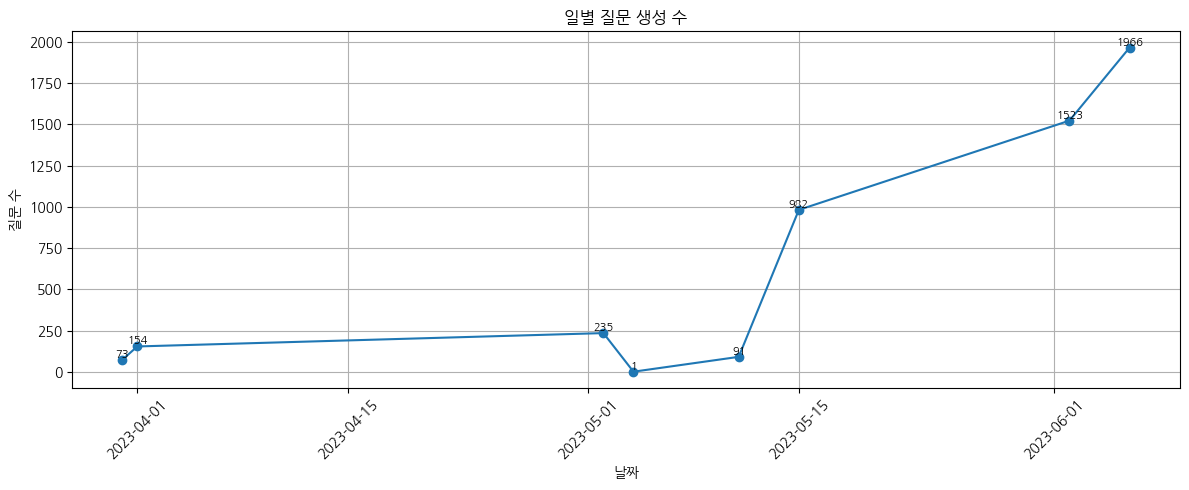

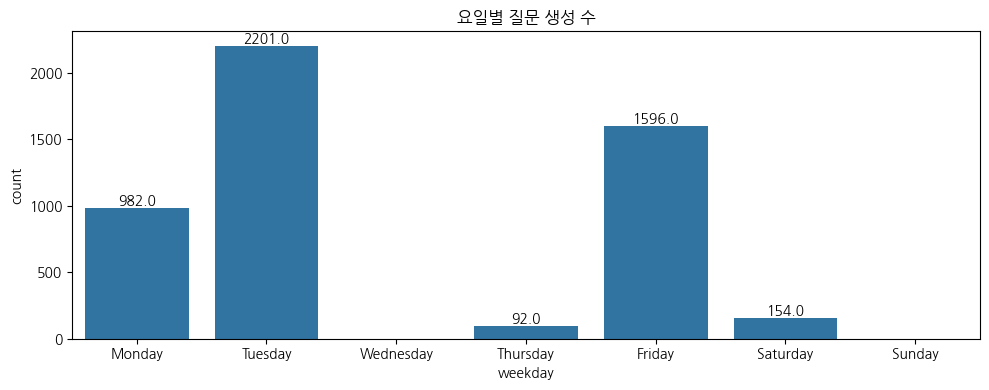

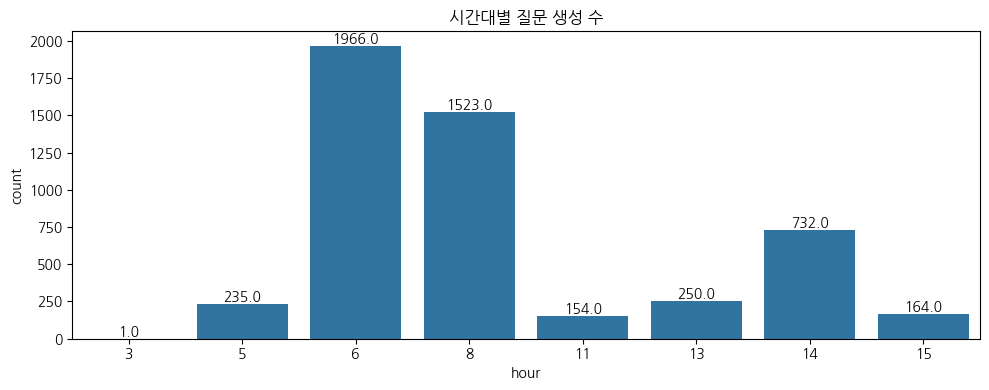

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜 파생 변수 생성
question_df['created_at'] = pd.to_datetime(question_df['created_at'])
question_df['date'] = question_df['created_at'].dt.date
question_df['hour'] = question_df['created_at'].dt.hour
question_df['weekday'] = question_df['created_at'].dt.day_name()

# 1. 일별 질문 수 (선 그래프)
plt.figure(figsize=(12, 5))
daily_counts = question_df['date'].value_counts().sort_index()
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('일별 질문 생성 수')
plt.xlabel('날짜')
plt.ylabel('질문 수')
plt.grid(True)

# 선 위에 값 표시
for x, y in zip(daily_counts.index, daily_counts.values):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# 2. 요일별 질문 수 (막대 그래프)
plt.figure(figsize=(10, 4))
ax1 = sns.countplot(data=question_df, x='weekday', 
                    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('요일별 질문 생성 수')

# 값 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. 시간대별 질문 수 (막대 그래프)
plt.figure(figsize=(10, 4))
ax2 = sns.countplot(data=question_df, x='hour')
plt.title('시간대별 질문 생성 수')

# 값 표시
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 누적신고 많은 질문

In [25]:
# question_id = 111에 해당하는 질문 내용 확인
question_df[question_df['id'] == 111]

,id,question_text,created_at,date,hour,weekday
12,111,마스크가 잘 어울리는 사람은?,2023-03-31 15:22:59,2023-03-31,15,Friday


In [26]:
question_df[question_df['id'] == 410]

,id,question_text,created_at,date,hour,weekday
311,410,발냄새가 호두과자 냄새일 것 같은 사람은?,2023-05-02 05:32:52,2023-05-02,5,Tuesday


In [27]:
question_df[question_df['id'] == 398]

,id,question_text,created_at,date,hour,weekday
299,398,등빨이 가장 좋은 사람은?,2023-05-02 05:32:50,2023-05-02,5,Tuesday


In [28]:
question_df[question_df['id'] == 424]

,id,question_text,created_at,date,hour,weekday
325,424,어깨가 가장 넓은 사람은?,2023-05-02 05:32:56,2023-05-02,5,Tuesday


In [29]:
question_df[question_df['id'] == 305]

,id,question_text,created_at,date,hour,weekday
206,305,먹방을 가장 잘할 것 같은 사람은?,2023-04-01 11:09:38,2023-04-01,11,Saturday


In [30]:
question_df[question_df['id'] == 564]

,id,question_text,created_at,date,hour,weekday
465,564,설레면 콧구멍이 커지는 친구는?,2023-05-11 15:52:18,2023-05-11,15,Thursday


In [31]:
question_df[question_df['id'] == 144]

,id,question_text,created_at,date,hour,weekday
45,144,발냄새가 가장 향긋할 것 같은 사람은?,2023-03-31 15:23:17,2023-03-31,15,Friday


In [32]:
question_df[question_df['id'] == 519]

,id,question_text,created_at,date,hour,weekday
420,519,콧수염을 기르면 잘 어울릴 것 같은 사람은?,2023-05-02 05:33:21,2023-05-02,5,Tuesday


In [33]:
question_df[question_df['id'] == 494]

,id,question_text,created_at,date,hour,weekday
395,494,먹방 찍으면 100만 유튜버가 될 것 같은 친구,2023-05-02 05:33:14,2023-05-02,5,Tuesday


In [34]:
question_df[question_df['id'] == 479]

,id,question_text,created_at,date,hour,weekday
380,479,치킨 중독인 것 같은 사람은?,2023-05-02 05:33:10,2023-05-02,5,Tuesday
